# **Uber Fare Prediction and Analysis using Machine Learning**

# **Problem Definition and Understanding**

## **Clear definition of the Problem Statement**

The goal of this project is to create a predictive model that forecasts Uber's fare prices and ride demand by leveraging data on distance, surge pricing, locations, weather conditions, traffic, and journey times. The model's effectiveness will be judged on its accuracy in predicting fares and anticipating demand spikes, which is vital for enhancing Uber's operational efficiency and customer satisfaction.


## **Understanding of the domain and data**

### **Setup: Installation of Essential Python Libraries**

In [1]:
# %pip install pandas # Install 'pandas' for data manipulation and analysis
# %pip install matplotlib # Install 'matplotlib' for creating static, interactive, and animated visualizations
# %pip install seaborn # Install 'seaborn' for statistical data visualization
# %pip install scikit-learn # Install 'scikit-learn' for machine learning and data mining tasks
# %pip install gdown # Install 'gdown' to download files from Google Drive
# %pip install tensorflow # Install 'tensorflow' for machine learning and neural network modeling

### **Importing Libraries for Comprehensive Data Analysis and Machine Learning**

This cell imports essential Python libraries for data manipulation, visualization, and machine learning. It includes Pandas, NumPy, Seaborn, and Matplotlib for data handling and plotting, Scikit-learn for machine learning tasks, and TensorFlow for deep learning model development. This setup is ideal for a wide range of data science applications.

In [2]:
# Basic Data Handling and Visualization Libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Support for large, multi-dimensional arrays and matrices
import seaborn as sns  # Advanced data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import gdown  # Download files from Google Drive
import requests  # HTTP library for Python
import tensorflow as tf  # Machine learning and neural networks

# Scikit-learn Libraries for Preprocessing, Model Selection, and Metrics
from sklearn.impute import SimpleImputer, KNNImputer  # Imputation transformers for completing missing values
from sklearn.decomposition import PCA  # Principal component analysis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder  # Data preprocessing utilities
from sklearn.linear_model import LassoCV, LinearRegression  # Linear models for regression
from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Metrics for evaluating model performance
from sklearn.tree import DecisionTreeRegressor  # Decision tree for regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble methods for regression
from sklearn.feature_selection import SelectKBest, f_regression  # Feature selection techniques
from sklearn.compose import ColumnTransformer  # Transformer to combine multiple transformers

# TensorFlow Libraries for Neural networks implementation
from tensorflow.keras.models import Sequential  # Sequential model API
from tensorflow.keras.layers import Dense, Dropout  # Layers for neural networks


### **Loading and Verifying UberBoston Dataset from Google Drive**

This cell initializes data analysis by downloading 'UberBoston.csv' from Google Drive and loading it into a Pandas DataFrame, confirming successful data retrieval for further examination.

In [3]:
# Define the URL of the dataset located on Google Drive
url = 'https://drive.google.com/uc?id=196SUi3JGyr6tfEckdf9-nN2_UxyfLItz'

# Specify the output filename for the downloaded dataset
output = 'UberBoston.csv'

# Initiate the download of the dataset from Google Drive to local storage
# gdown.download(url, output, quiet=False)

# Assign the output filename to a variable for dataset path
dataset = output

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(dataset)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

# Confirmation message after successful dataset loading
print("Done with dataset loading")


                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...     

### **Inspecting DataFrame Structure and Information**

This cell executes df.info(), providing an overview of the DataFrame 'df', including data types, non-null counts, and structure for initial data exploration and cleaning.

In [4]:
# Display a concise summary of the DataFrame, including column data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# **Data Preparation and Preprocessing**

## **Data Cleaning and Handling Missing Values**

### **Identifying and Reporting Missing Values in DataFrame**

This cell identifies and reports missing values in each column of DataFrame 'df', crucial for data preprocessing and cleaning.

In [5]:
# Create a dictionary to count missing values in each column of the DataFrame
missing_values = df.isnull().sum()

# Iterate through the dictionary to display columns that have missing values
for col, count in missing_values.items():
    if count > 0:
        print(f"Column '{col}' has {count} missing values.")


Column 'price' has 55095 missing values.


### **Cleaning DataFrame by Removing Rows with Missing Target Values**

This cell cleans the DataFrame 'df' by removing rows with missing values in the 'price' target column, ensuring data integrity for analysis.

In [6]:
# Define the target column for prediction or analysis by replacing 'target_column_name' with your actual column name
target_column = 'price'

# Remove rows from the DataFrame where the target column has missing values
df = df.dropna(subset=[target_column])

# Print a confirmation of the number of remaining missing values in the target column, expecting zero
print(f"Remaining missing values in target column: {df[target_column].isnull().sum()}")


Remaining missing values in target column: 0


### **Assessing Missing Values and Listing All Columns in DataFrame**

This cell reports missing values in each DataFrame column and lists all column names, aiding initial data exploration and understanding.

In [7]:
# Count missing values in each column of the DataFrame and store in a dictionary
missing_values = df.isnull().sum()

# Iterate through each column, displaying the count of missing values (including zero)
for col, count in missing_values.items():
    if count >= 0:
        print(f"Column '{col}' has {count} missing values.")

# Output a list of all column names present in the DataFrame
print(df.columns.tolist())


Column 'id' has 0 missing values.
Column 'timestamp' has 0 missing values.
Column 'hour' has 0 missing values.
Column 'day' has 0 missing values.
Column 'month' has 0 missing values.
Column 'datetime' has 0 missing values.
Column 'timezone' has 0 missing values.
Column 'source' has 0 missing values.
Column 'destination' has 0 missing values.
Column 'cab_type' has 0 missing values.
Column 'product_id' has 0 missing values.
Column 'name' has 0 missing values.
Column 'price' has 0 missing values.
Column 'distance' has 0 missing values.
Column 'surge_multiplier' has 0 missing values.
Column 'latitude' has 0 missing values.
Column 'longitude' has 0 missing values.
Column 'temperature' has 0 missing values.
Column 'apparentTemperature' has 0 missing values.
Column 'short_summary' has 0 missing values.
Column 'long_summary' has 0 missing values.
Column 'precipIntensity' has 0 missing values.
Column 'precipProbability' has 0 missing values.
Column 'humidity' has 0 missing values.
Column 'windS

### **Displaying Column Names of the DataFrame**

The cell displays all column names in the DataFrame df, aiding in dataset familiarity and feature identification.

In [8]:
# Retrieve and display the list of column names from the DataFrame
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## **Feature Slection and Feature Enginnering**

### **Feature Selection Using LassoCV on Numeric Data**

The cell selects significant numeric features using LassoCV, standardizes data, and splits it into training and testing sets. It concludes by identifying and listing Lasso-selected features.

In [9]:
# Import relevant modules for Lasso regression and data processing
# from sklearn.linear_model import LassoCV
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame where 'price' is the target variable

# Identify and select numeric columns (excluding 'price' if it is numeric)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('price')

# Split the DataFrame into features (X) and target (y)
X = df[numeric_cols]
y = df['price']

# Initialize and apply a StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate a LassoCV regressor and fit it to the training data
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Identify features that are selected (non-zero coefficients) by Lasso
lasso_coef = lasso.coef_ != 0
selected_features = numeric_cols[lasso_coef]

# Output the features selected by the Lasso model
print("Features selected by Lasso:", selected_features.tolist())


Features selected by Lasso: ['distance', 'surge_multiplier', 'latitude', 'apparentTemperatureLow']


### **Analyzing Correlations Between Numeric Features and Price**

The cell calculates and visualizes significant correlations between numeric features and 'price', aiding in feature selection for predictive analysis.

Numeric Columns for Correlation Analysis: ['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


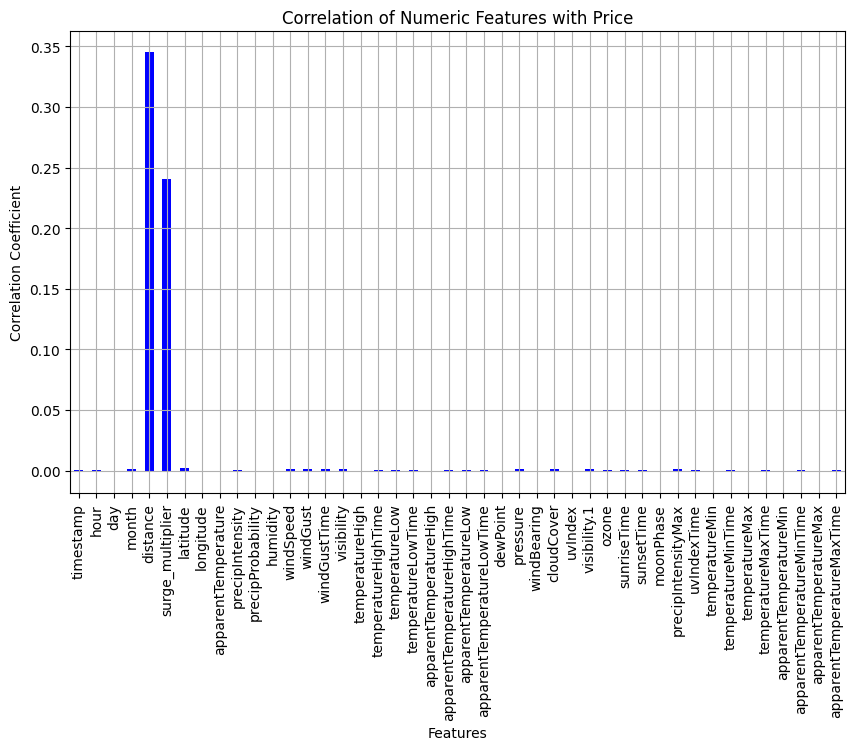

In [10]:
# Import visualization libraries
# import matplotlib.pyplot as plt
# import seaborn as sns

# Define a comprehensive list of features for the correlation analysis
features = ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

# Filter out the numeric columns from the provided feature list
numeric_features = [col for col in features if df[col].dtype in ['int64', 'float64']]

# Display the numeric columns that will be used for correlation analysis
print("Numeric Columns for Correlation Analysis:", numeric_features)

# Calculate the correlation matrix for the numeric features in the DataFrame
correlation_matrix = df[numeric_features].corr()

# Isolate the correlation values of the 'price' column, excluding its self-correlation
price_correlation = correlation_matrix['price'].drop('price')

# Apply a threshold to filter significant correlations, both positive and negative
threshold = 0.0001
price_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

# Create a bar plot to visualize the correlation of each feature with the price
plt.figure(figsize=(10, 6))
price_correlation.plot.bar(color='blue')
plt.title('Correlation of Numeric Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

### **Identifying Non-Numeric Columns in the Dataset**

This cell identifies and lists non-numeric columns in the DataFrame for specialized data handling.

In [11]:
# Define a comprehensive list of all features in the dataset
features = ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

# Filter and list out the non-numeric columns based on their data type
non_numeric_features = [col for col in features if df[col].dtype not in ['int64', 'float64']]

# Output the non-numeric columns for review
print("Non-Numeric Columns:", non_numeric_features)


Non-Numeric Columns: ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


### **Creating a Backup of the Original DataFrame**

This cell creates a backup of the original DataFrame df to preserve data integrity.

In [12]:
# Create a copy of the DataFrame 'df' and store it in 'df_backup' for safekeeping
df_backup = df.copy()

### **Removing Unique Identifiers from DataFrame**

This cell removes 'id' and 'product_id' columns from the DataFrame for a more focused analysis.

In [13]:
# Removing columns 'id' and 'product_id' from the DataFrame since they are unique identifiers and do not provide valuable information for analysis.
df = df.drop(columns=['id', 'product_id'])

### **Removing Specific Columns from DataFrame**

This cell removes specified time and meteorological columns from 'df', then displays remaining columns.

In [14]:
# List of columns to be removed from the DataFrame. These include various time-related and meteorological data columns.
columns_to_drop = [ 
    'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 
    'latitude', 'longitude', 'long_summary', 'windGustTime', 
    'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 
    'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 
    'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 
    'apparentTemperatureMaxTime'
]

# Executing the column removal. 'errors='ignore'' ensures the code runs even if some columns are not present.
df = df.drop(columns=columns_to_drop, errors='ignore')

# Outputting the updated list of columns and the total count after the removal process.
print("Remaining Columns:", df.columns.tolist())
print("Number of Remaining Columns:", len(df.columns))


Remaining Columns: ['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']
Number of Remaining Columns: 34


### **Visualizing Correlations of Various Features with Price**

This cell analyzes and visualizes significant correlations between 'price' and various temperature features in a DataFrame using a bar plot.

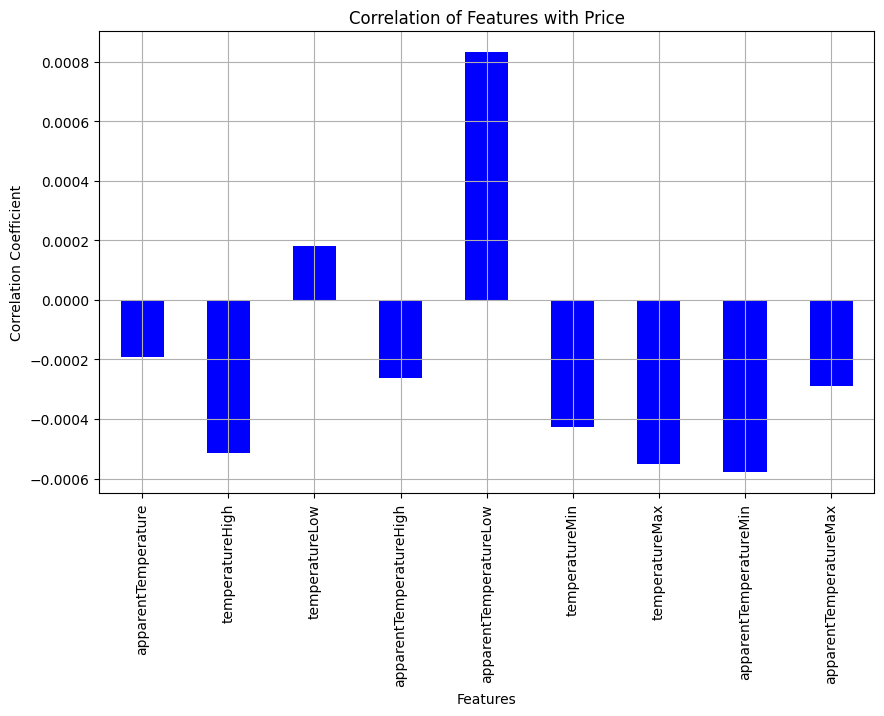

In [15]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the list of features for conducting correlation analysis with 'price'
features = [
    'price', 'temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 
    'apparentTemperatureMin', 'apparentTemperatureMax'
]

# Calculating the correlation matrix for the specified features
correlation_matrix = df[features].corr()

# Extracting correlation values specific to 'price', excluding the correlation of 'price' with itself
price_correlation = correlation_matrix['price'].drop('price')

# Filtering out correlation values based on a defined threshold for significance
# The threshold can be modified based on specific analysis requirements
threshold = 0.0001
price_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

# Plotting the filtered correlation values
plt.figure(figsize=(10, 6))
price_correlation.plot.bar(color='blue')
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


### **Enhanced Visualization of Price Feature Correlations**

This cell visualizes significant correlations between 'price' and temperature features in a DataFrame, using an adjusted y-axis for detailed insights.

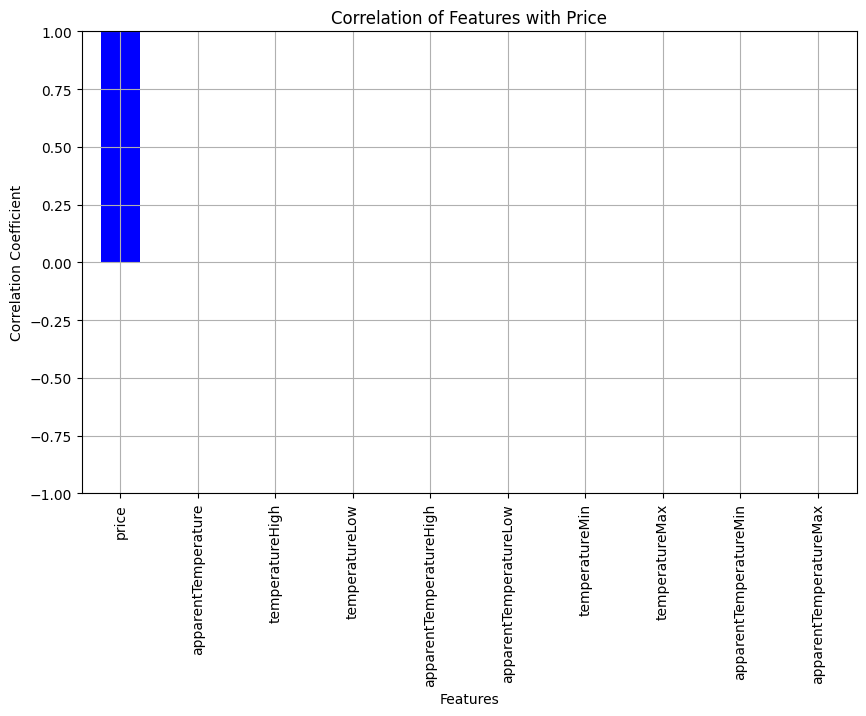

In [16]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the list of features to be analyzed for correlation with 'price'
features = [
    'price', 'temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 
    'apparentTemperatureMin', 'apparentTemperatureMax'
]

# Calculating the correlation matrix among the specified features
correlation_matrix = df[features].corr()

# Extracting all correlation values of 'price', including its self-correlation
price_correlation = correlation_matrix['price']

# Applying a threshold to filter significant correlation values
# Adjust the threshold value as needed for different analysis requirements
threshold = 0.0001
price_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

# Plotting the correlation values with enhanced visualization settings
plt.figure(figsize=(10, 6))
price_correlation.plot.bar(color='blue')
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Adjusting the y-axis limits to better display smaller correlation values
plt.ylim(-1, 1)  # Sets y-axis range from -1 to 1 for a more detailed view

plt.grid(True)
plt.show()


### **Removing Temperature-Related Features from DataFrame**

This cell removes temperature-related features from a DataFrame and confirms the updated structure post-removal.

In [17]:
# Defining a list of temperature-related features to be removed from the DataFrame
features_to_drop = [
    'temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 
    'apparentTemperatureMin', 'apparentTemperatureMax'
]

# Executing the drop operation to remove the specified features
# 'errors='ignore'' allows the operation to proceed even if some columns are not present
df = df.drop(columns=features_to_drop, errors='ignore')

# Printing the updated list of columns and their count to confirm the changes
print("Remaining columns:", df.columns.tolist())
print("Number of remaining columns:", len(df.columns))


Remaining columns: ['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax']
Number of remaining columns: 24


### **Analyzing and Visualizing Correlation of Climate Features with Price**

This cell analyzes and visualizes significant correlations between climate features and 'price' in a DataFrame, using a bar chart for clear interpretation.

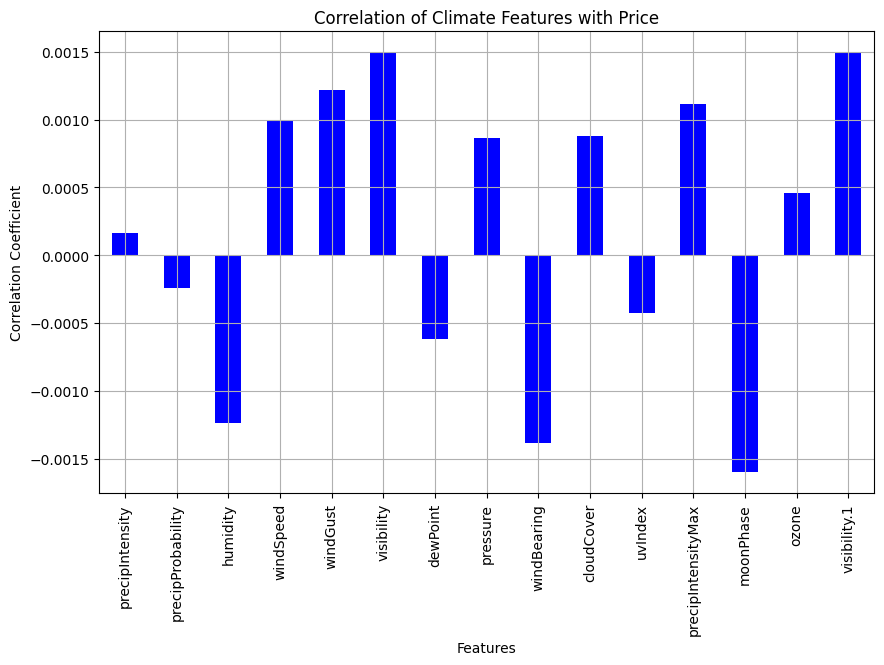

In [18]:
# Importing the necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Specifying a list of climate-related features for correlation analysis with 'price'
features = [
    'price', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 
    'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'moonPhase', 
    'ozone', 'visibility.1'
]

# Calculating the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Isolating the correlation values of 'price', excluding its self-correlation
price_correlation = correlation_matrix['price'].drop('price')

# Applying a threshold to filter out insignificant correlation values
# The threshold can be adjusted based on specific analysis needs
threshold = 0.0001
price_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

# Creating a bar plot to visualize the correlations of climate features with 'price'
plt.figure(figsize=(10, 6))
price_correlation.plot.bar(color='blue')
plt.title('Correlation of Climate Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


### **Comprehensive Visualization of Feature Correlations with Price**

This cell visualizes significant correlations between climate features and 'price' in a DataFrame, using a bar chart with an adjusted y-axis for detailed analysis.

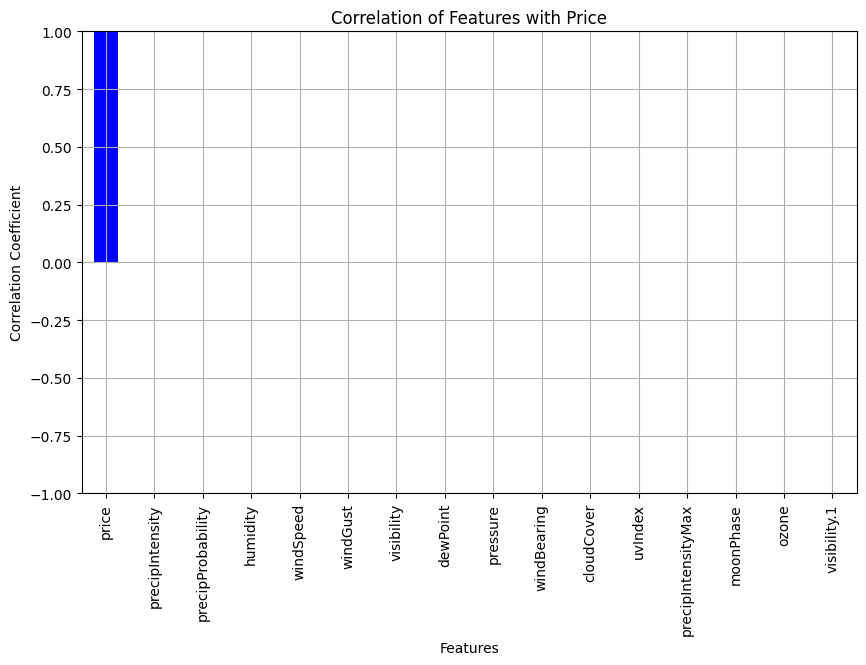

In [19]:
# Importing the necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Defining a list of features including 'price' and various climate-related aspects for correlation analysis
features = [
    'price', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 
    'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'moonPhase', 
    'ozone', 'visibility.1'
]

# Computing the correlation matrix for the specified features
correlation_matrix = df[features].corr()

# Extracting the correlation values for 'price', including its self-correlation
price_correlation = correlation_matrix['price']

# Applying a threshold to filter the correlation values, retaining significant correlations
threshold = 0.0001
price_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

# Plotting the correlations in a bar chart for a visual representation
plt.figure(figsize=(10, 6))
price_correlation.plot.bar(color='blue')
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

# Adjusting the y-axis range to enhance visualization of smaller correlation values
plt.ylim(-1, 1)  # Sets the y-axis range from -1 to 1 for better detail

plt.grid(True)
plt.show()


### **Data Reduction: Removing Selected Climate Features from DataFrame**

This cell streamlines the DataFrame by eliminating selected climate-related features, confirming the updated structure with a list of remaining columns.

In [20]:
# Defining a list of climate-related features to be removed from the DataFrame
features_to_drop = [ 
    'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 
    'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 
    'moonPhase', 'ozone', 'visibility.1'
]

# Performing the removal of specified features from the DataFrame
# The 'errors='ignore'' parameter allows the operation to continue even if some columns are absent
df = df.drop(columns=features_to_drop, errors='ignore')

# Printing the updated list of columns and the total count of remaining columns to confirm the operation
print("Remaining columns:", df.columns.tolist())
print("Number of remaining columns:", len(df.columns))


Remaining columns: ['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'short_summary', 'icon']
Number of remaining columns: 9


### **Identifying and Listing Categorical Columns in DataFrame**

This cell identifies and lists all categorical columns in the DataFrame, crucial for data preprocessing and analysis.

In [21]:
# Identifying columns in the DataFrame 'df' that are of categorical types (i.e., 'object' or 'category')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Printing the list of identified categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


### **Listing All Column Names in DataFrame**

This cell lists all column names in the DataFrame, providing a quick overview of available variables.

In [22]:
# Displaying the names of all columns present in the DataFrame 'df'
print(df.columns)

Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'short_summary', 'icon'],
      dtype='object')


### **Correlation Analysis with Price for One-Hot Encoded Features**

This cell performs advanced data analysis, visualizing correlations between one-hot encoded categorical features and the 'price' target variable in the DataFrame.

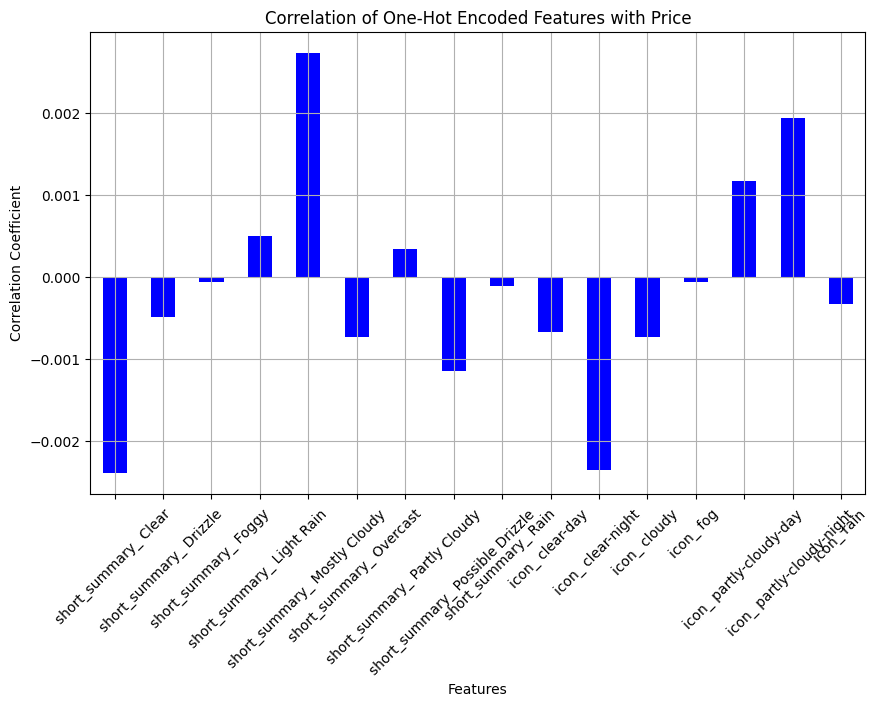

Newly added columns due to one-hot encoding: ['short_summary_ Clear ', 'short_summary_ Drizzle ', 'short_summary_ Foggy ', 'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ', 'short_summary_ Rain ', 'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ', 'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ']


In [23]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the original DataFrame

# Performing one-hot encoding on the 'short_summary' and 'icon' columns of the DataFrame
df_encoded = pd.get_dummies(df, columns=['short_summary', 'icon'])

# Compiling a list of the newly created columns from one-hot encoding of 'short_summary' and 'icon'
encoded_columns = [col for col in df_encoded.columns if 'short_summary' in col or 'icon' in col]

# Calculating the correlations of these one-hot encoded features with the 'price' feature
correlation_with_price = df_encoded[['price'] + encoded_columns].corr().loc['price']

# Excluding the self-correlation of 'price'
correlation_with_price = correlation_with_price.drop('price')

# Plotting the correlation coefficients in a bar chart for visualization
plt.figure(figsize=(10, 6))
correlation_with_price.plot.bar(color='blue')
plt.title('Correlation of One-Hot Encoded Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  # Rotating the feature labels for better readability
plt.grid(True)
plt.show()

# Determining the new columns added to 'df_encoded' as a result of one-hot encoding
newly_added_columns = [col for col in df_encoded.columns if col not in df.columns]

# Displaying the list of newly added columns
print("Newly added columns due to one-hot encoding:", newly_added_columns)


### **Removing One-Hot Encoded Columns from the Enhanced DataFrame**

This cell refines the DataFrame `df_encoded` by removing specific one-hot encoded columns that were derived from the 'short_summary' and 'icon' categories. This step simplifies the DataFrame for further analysis or modeling.

In [24]:
# Dropping specific one-hot encoded columns from the DataFrame 'df_encoded'
# These columns are derived from the 'short_summary' and 'icon' categories
df_encoded = df_encoded.drop(columns=[
    'short_summary_ Clear ', 'short_summary_ Drizzle ', 'short_summary_ Foggy ', 
    'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ', 'short_summary_ Overcast ', 
    'short_summary_ Partly Cloudy ', 'short_summary_ Possible Drizzle ', 'short_summary_ Rain ', 
    'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ', 
    'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain '
])


### **Simplifying DataFrame by Removing Selected Columns**

This cell performs a basic data cleaning operation by removing the 'short_summary' and 'icon' columns from the DataFrame 'df'. This step simplifies the DataFrame for further analysis or modeling.

In [25]:
# Listing the features to be removed from the DataFrame 'df'
features_to_drop = ['short_summary', 'icon']

# Dropping the specified features from the DataFrame
# Using 'errors='ignore'' to proceed without error even if a column is not present
df = df.drop(columns=features_to_drop, errors='ignore')


### **Displaying Current Column Names in DataFrame**

This cell displays the names of all columns in the DataFrame 'df', providing an overview of the current data structure.

In [26]:
# Retrieving and displaying the list of all current column names in the DataFrame 'df'
print(df.columns)


Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier'],
      dtype='object')


### **Analyzing Price Correlations with One-Hot Encoded Source and Destination Features**

This cell analyzes the correlation between one-hot encoded features derived from the 'source' and 'destination' columns and the 'price' feature in a DataFrame. It visualizes these correlations to understand the relationships between categorical location data and price.

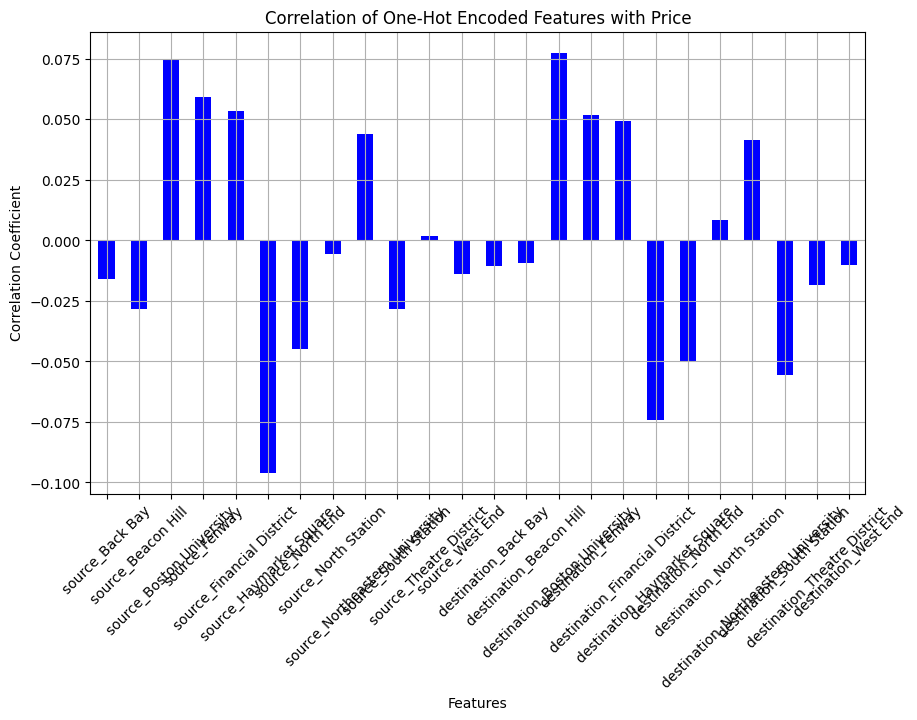

Newly added columns due to one-hot encoding: ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 'destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End']


In [27]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the original DataFrame

# Applying one-hot encoding to the 'source' and 'destination' columns of the DataFrame
df_encoded = pd.get_dummies(df, columns=['source', 'destination'])

# Creating a list of the new columns generated from one-hot encoding of 'source' and 'destination'
encoded_columns = [col for col in df_encoded.columns if 'source' in col or 'destination' in col]

# Calculating the correlations of these one-hot encoded features with the 'price' feature
correlation_with_price = df_encoded[['price'] + encoded_columns].corr().loc['price']

# Excluding the self-correlation of 'price' from the correlation data
correlation_with_price = correlation_with_price.drop('price')

# Plotting the correlation coefficients in a bar chart to visualize the findings
plt.figure(figsize=(10, 6))
correlation_with_price.plot.bar(color='blue')
plt.title('Correlation of One-Hot Encoded Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  # Rotating the labels for better readability
plt.grid(True)
plt.show()

# Identifying the columns that were added to the DataFrame as a result of one-hot encoding
newly_added_columns = [col for col in df_encoded.columns if col not in df.columns]

# Displaying the list of newly added columns due to one-hot encoding
print("Newly added columns due to one-hot encoding:", newly_added_columns)


### **Refining the DataFrame by Removing Specific One-Hot Encoded Columns**

This cell removes specific one-hot encoded columns from the DataFrame df_encoded, likely as part of feature selection or data simplification.

In [28]:
# Removing a list of one-hot encoded columns related to 'source' and 'destination' from the DataFrame 'df_encoded'
# These columns represent specific locations for source and destination
df_encoded = df_encoded.drop(columns=[
    'source_Back Bay', 'source_Beacon Hill', 'source_Boston University', 'source_Fenway', 
    'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 
    'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End', 
    'destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 
    'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 
    'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 
    'destination_Theatre District', 'destination_West End'
])


### **Streamlining DataFrame by Dropping 'Source' and 'Destination' Columns**

In [29]:
# Defining the columns 'source' and 'destination' to be removed from the DataFrame
features_to_drop = ['source', 'destination']

# Executing the removal of these columns from the DataFrame 'df'
# The 'errors='ignore'' parameter ensures the operation proceeds even if a column is not found
df = df.drop(columns=features_to_drop, errors='ignore')


### **Displaying Updated Column Names in DataFrame**

This cell lists the column names in the DataFrame df using the command df.columns and displays them with the print function. It's essential for confirming the DataFrame's current structure after any modifications.

In [30]:
# Outputting the current list of column names in the DataFrame 'df'
print(df.columns)

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')


### **Visualizing Price Distribution with Histogram and Density Plot**

This cell creates a histogram combined with a Kernel Density Estimate (KDE) plot to visualize the distribution of the 'price' variable in the DataFrame df. The plot includes 50 bins for granularity and a green KDE overlay for a smooth density representation. It has a title, axis labels, and a grid for better interpretation.

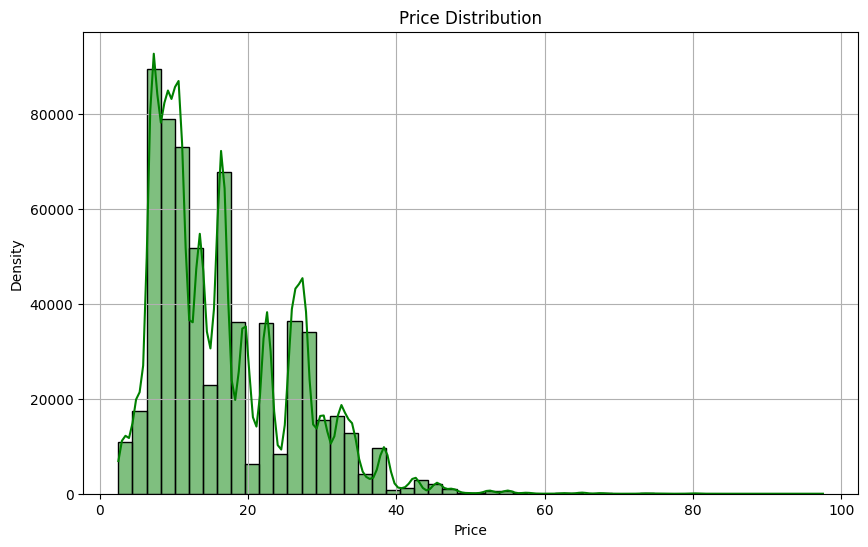

In [31]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the size of the plot to 10x6 inches for better visibility
plt.figure(figsize=(10, 6))

# Creating a histogram with a Kernel Density Estimate (KDE) for the 'price' column in the DataFrame 'df'
# The histogram uses 50 bins and is colored green with 50% transparency
sns.histplot(df['price'], bins=50, kde=True, color='green', alpha=0.5)

# Adding a title and labels to the plot for clarity and context
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')

# Enabling grid on the plot for easier reference and analysis
plt.grid(True)

# Displaying the plot
plt.show()


### **Creating a Box Plot to Examine Price Distribution**

This cell visualizes the distribution of the 'price' variable in the DataFrame df using a box plot. It helps in understanding the central tendency, spread, and presence of outliers in the data.

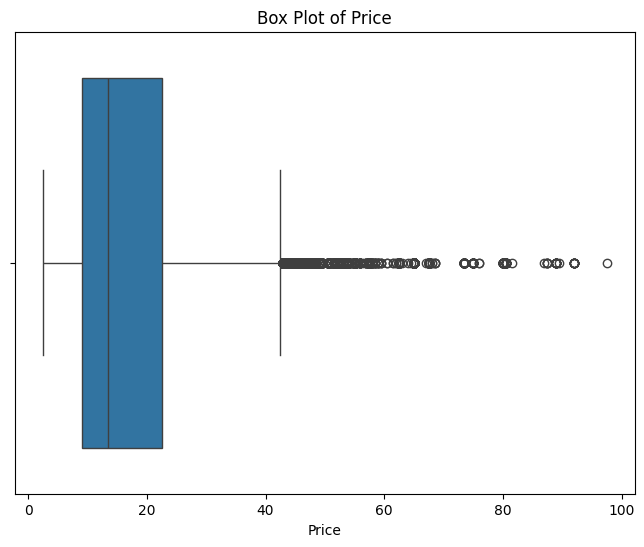

In [32]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure size for the box plot
plt.figure(figsize=(8, 6))

# Creating a box plot for the 'price' column in the DataFrame 'df' using Seaborn
sns.boxplot(x=df['price'])

# Adding a title and label to the plot
plt.title('Box Plot of Price')
plt.xlabel('Price')

# Displaying the plot
plt.show()


### **Identifying and Removing Outliers in Price Data**

In this cell, outliers are identified and removed from the 'price' data in the DataFrame df using the Interquartile Range (IQR) method, ensuring a cleaner dataset for analysis.

In [33]:
# Calculating the first quartile (Q1) and third quartile (Q3) for the 'price' column in the DataFrame
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Computing the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Defining the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to exclude outliers based on the calculated bounds
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Displaying the shape of the new DataFrame that excludes outliers
print(df_no_outliers.shape)
# Alternatively, displaying the first few rows of the DataFrame without outliers
print(df_no_outliers.head())


(632387, 5)
  cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0


### **Updating the Original DataFrame with Outlier-Free Data**

In this cell, the original DataFrame df is updated to contain only the data from which outliers in the 'price' column have been removed. This is achieved by replacing df with the contents of df_no_outliers, ensuring data integrity.

In [34]:
# Updating the original DataFrame 'df' by replacing it with the outlier-free DataFrame 'df_no_outliers'
# Using the 'copy' method to ensure that 'df' is a separate object and not just a reference to 'df_no_outliers'
df = df_no_outliers.copy()

### **Displaying the First Few Rows of the Updated DataFrame**

In this cell, the head() method is used to display the first five rows of the DataFrame df, providing a quick snapshot of its current state. This is a common practice in data analysis for data inspection and verification after making modifications.

In [35]:
# Displaying the first five rows of the DataFrame 'df' to preview its current state
print(df.head())

  cab_type          name  price  distance  surge_multiplier
0     Lyft        Shared    5.0      0.44               1.0
1     Lyft           Lux   11.0      0.44               1.0
2     Lyft          Lyft    7.0      0.44               1.0
3     Lyft  Lux Black XL   26.0      0.44               1.0
4     Lyft       Lyft XL    9.0      0.44               1.0


### **Visualizing the Frequency Distribution of Cab Types**

This cell creates a count plot to visualize the frequency distribution of different 'cab_type' categories in the DataFrame df. The plot provides a clear overview of the distribution of cab types in the dataset.

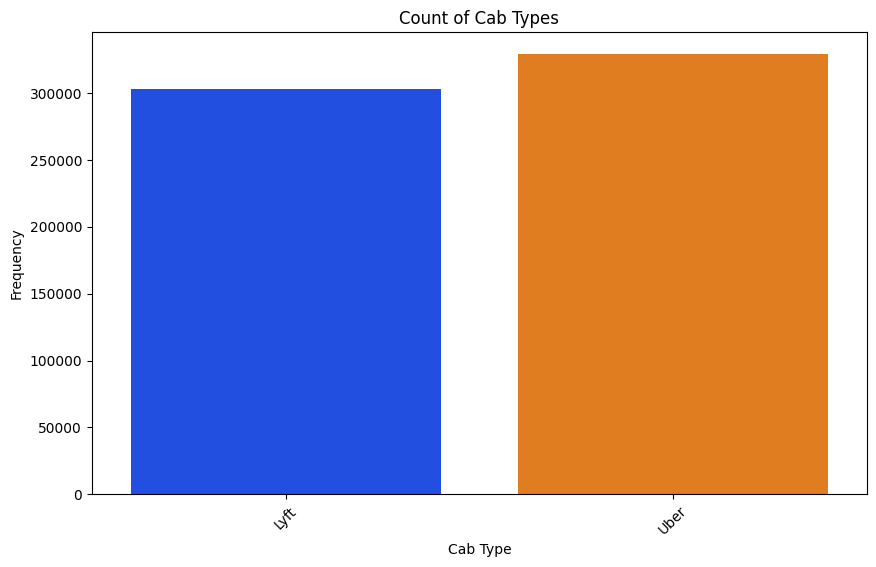

In [36]:
# Setting up the figure size for the count plot
plt.figure(figsize=(10, 6))

# Creating a count plot for the 'cab_type' feature in the DataFrame 'df'
# The hue is set to the same 'cab_type' to color different cab types distinctly
# 'palette='bright'' is used for vibrant color distinctions
# 'dodge=False' ensures the bars are not separated
sns.countplot(data=df, x='cab_type', hue='cab_type', palette='bright', dodge=False)

# Adding a title and axis labels to the plot
plt.title('Count of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Hiding the legend as it's redundant in this context
plt.legend([], frameon=False)

# Displaying the plot
plt.show()


### **Horizontal Count Plot for Frequency Distribution of Names**

This cell creates a horizontal count plot to visualize the frequency distribution of different 'names' categories in the DataFrame df. The plot provides a clear overview of the distribution of names in the dataset, ordered by frequency.

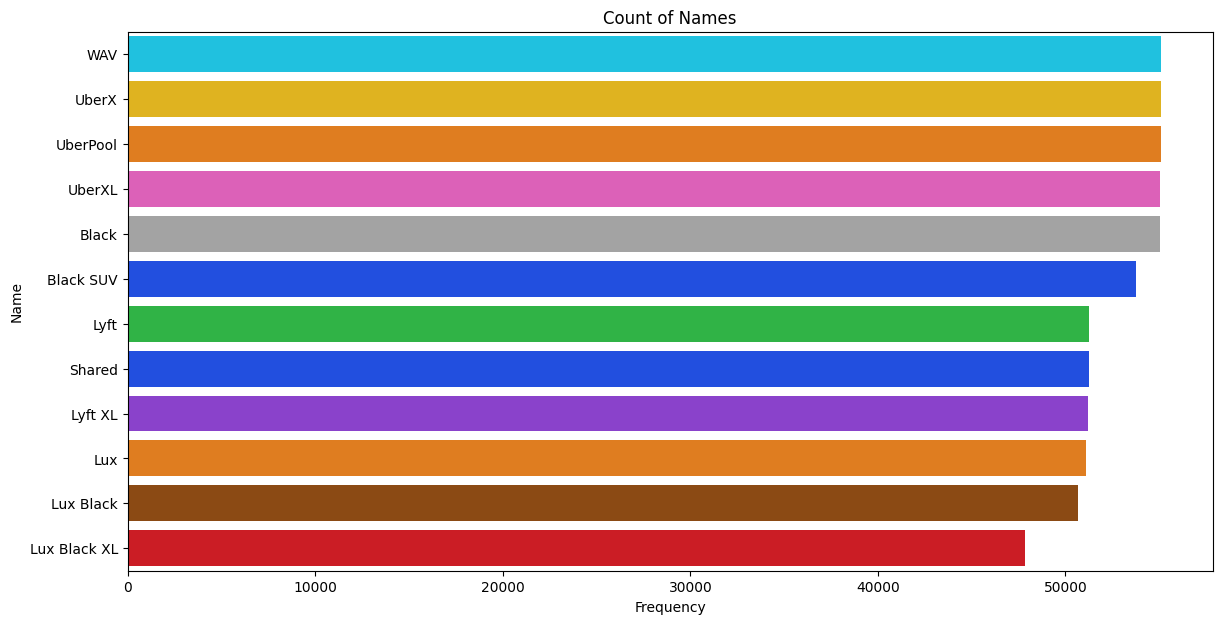

In [37]:
# Setting up the figure size for the horizontal count plot
plt.figure(figsize=(14, 7))

# Creating a horizontal count plot for the 'name' feature in the DataFrame 'df'
# The hue is set to the same 'name' to apply distinct colors to different names
# The 'palette' is set to 'bright' for clear color differentiation
# 'order' is set to display names in descending order of their count
# 'dodge=False' ensures the bars are not separated
sns.countplot(data=df, y='name', hue='name', palette='bright', order=df['name'].value_counts().index, dodge=False)

# Adding a title and axis labels to the plot
plt.title('Count of Names')
plt.ylabel('Name')
plt.xlabel('Frequency')

# Hiding the legend as it's redundant given the clear labeling of the plot
plt.legend([], frameon=False)

# Displaying the plot
plt.show()


### **Outlier Detection and Removal in Price Data**

In this cell, outliers are detected and removed from the 'price' column of DataFrame df. The IQR method is used to define bounds for outliers, and the resulting DataFrame after removal is df_filtered. The number of removed rows is calculated and displayed.

In [38]:
# Calculating the first quartile (Q1) and third quartile (Q3) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Computing the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Determining the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers that fall outside the defined bounds
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Calculating the number of rows removed due to outlier filtering
rows_removed = df.shape[0] - df_filtered.shape[0]

# Displaying the size of the original DataFrame, the size after outlier removal, and the number of rows removed
print(f"Original DataFrame size: {df.shape}")
print(f"DataFrame size after outlier removal: {df_filtered.shape}")
print(f"Number of rows removed: {rows_removed}")


Original DataFrame size: (632387, 5)
DataFrame size after outlier removal: (632387, 5)
Number of rows removed: 0


### **Calculating and Displaying Outlier Bounds and Descriptive Statistics for Price**

In this cell, statistical measures for the 'price' column are calculated and displayed. This includes Q1, Q3, IQR, lower and upper bounds for potential outliers, as well as the minimum and maximum values of 'price'. These measures are essential for understanding data distribution and identifying outliers.

In [39]:
# Calculating the first quartile (Q1) and third quartile (Q3) for the 'price' column in the DataFrame
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Computing the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Determining the lower and upper bounds for outlier identification in the 'price' data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Printing the calculated outlier bounds along with the actual minimum and maximum values of 'price'
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Actual Minimum Price: {df['price'].min()}")
print(f"Actual Maximum Price: {df['price'].max()}")

# Additionally, printing the values of Q1, Q3, and IQR for further inspection
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")


Lower Bound for Outliers: -11.25
Upper Bound for Outliers: 42.75
Actual Minimum Price: 2.5
Actual Maximum Price: 42.5
Q1 (25th percentile): 9.0
Q3 (75th percentile): 22.5
IQR (Interquartile Range): 13.5


### **Listing All Column Names in the DataFrame**

This cell displays the column names in the DataFrame df using df.columns and print. It's a basic step for reviewing the DataFrame's structure.

In [40]:
# Displaying the list of all column names currently in the DataFrame 'df'
print(df.columns)

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')


# **Model Development and Generalization**

### **Preparing Data for Machine Learning: Feature Selection and Train-Test Split**

In [41]:
# Importing necessary libraries and modules for machine learning
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import numpy as np

# Assuming 'df_filtered' contains the dataset with outliers removed
# Selecting only numeric features for X and setting 'price' as the target variable y
X = df_filtered.drop('price', axis=1).select_dtypes(include=[np.number])
y = df_filtered['price']

# Printing the shapes of the feature set X and target variable y for verification
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Splitting the dataset into training and testing sets with an 80-20 split and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X (features): (632387, 2)
Shape of y (target): (632387,)
Shape of X_train: (505909, 2)
Shape of X_test: (126478, 2)
Shape of y_train: (505909,)
Shape of y_test: (126478,)


### **Displaying Current Column Names in DataFrame**

In [42]:
# Retrieving and displaying the list of all current column names in the DataFrame 'df'
print(df.columns)

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')


## **Choice of appropriate model**

### **Training and Evaluating the Performance of a Linear Regression Model**

This cell trains a Linear Regression model on the provided dataset, makes predictions, and evaluates its performance using various metrics including MSE, RMSE, MAE, R-squared, and Adjusted R-squared. It's crucial for assessing the model's accuracy and predictive power.

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, and y_test are already defined

# Creating and training the Linear Regression model using the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on both the training and test sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Function to calculate and print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, X_data, dataset_type='Train'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_data.shape[1] - 1)

    print(f"{dataset_type} Set Linear Regression Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Adjusted R^2 Score: {adjusted_r2}\n")

# Printing evaluation metrics for the training set
print_evaluation_metrics(y_train, y_train_pred_lr, X_train, 'Training')

# Printing evaluation metrics for the test set
print_evaluation_metrics(y_test, y_test_pred_lr, X_test, 'Test')


Training Set Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 67.60274883124883
Root Mean Squared Error (RMSE): 8.222089079500954
Mean Absolute Error (MAE): 6.801448272451249
R^2 Score: 0.12102204637372727
Adjusted R^2 Score: 0.1210185715070381

Test Set Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 67.64720229216643
Root Mean Squared Error (RMSE): 8.224791930022693
Mean Absolute Error (MAE): 6.8122665299093015
R^2 Score: 0.12010168295854318
Adjusted R^2 Score: 0.12008776877286154



### **Advanced Feature Engineering and Model Evaluation in Linear Regression**

This cell demonstrates an advanced approach to Linear Regression by incorporating feature engineering, selection, and transformation. It trains a model on the transformed feature set and evaluates its performance using various metrics.

In [44]:
# Assuming 'df_no_outliers' is the DataFrame after removing outliers
# Example of feature engineering: creating a new feature by dividing 'price' by 'distance'
df_no_outliers['new_feature'] = df_no_outliers['price'] / df_no_outliers['distance']

# Preparing the feature set (X) and target variable (y)
X = df_no_outliers.drop('price', axis=1).select_dtypes(include=[np.number])
y = df_no_outliers['price']

# Splitting the data into training and testing sets with a 20% test size and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting the best features using SelectKBest
selector = SelectKBest(f_regression, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Standardizing the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Generating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Training a Linear Regression model with the transformed features
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test_poly)

# Evaluating the model's performance using various metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
n = X_test_poly.shape[0]  # Number of observations in the test set
p = X_test_poly.shape[1]  # Number of features (predictors)
adjusted_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

# Printing the evaluation metrics
print("Linear Regression Evaluation Metrics:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("Mean Absolute Error:", mae_lr)
print("R^2 Score:", r2_lr)
print("Adjusted R^2 Score:", adjusted_r2_lr)


Linear Regression Evaluation Metrics:
Mean Squared Error: 1.6263737711519293e-23
Root Mean Squared Error: 4.032832467574037e-12
Mean Absolute Error: 3.1361817356547695e-12
R^2 Score: 1.0
Adjusted R^2 Score: 1.0


### **Training and Evaluating the Performance of a Decision Tree Regression Model**

This cell trains and evaluates a Decision Tree Regressor model using provided data. The model's performance is assessed with various metrics, including MSE, RMSE, MAE, and R-squared.

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Training a Decision Tree Regressor model with a random state for reproducibility
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Fitting the model to the training data

# Making predictions on both the training and test sets
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Function to calculate and print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type='Train'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_type} Set Decision Tree Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}\n")

# Printing evaluation metrics for the training set
print_evaluation_metrics(y_train, y_train_pred_dt, 'Training')

# Printing evaluation metrics for the test set
print_evaluation_metrics(y_test, y_test_pred_dt, 'Test')


Training Set Decision Tree Evaluation Metrics:
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error (MAE): 0.0
R^2 Score: 1.0

Test Set Decision Tree Evaluation Metrics:
Mean Squared Error (MSE): 0.0033766939704928914
Root Mean Squared Error (RMSE): 0.058109327740844596
Mean Absolute Error (MAE): 0.002249798383908664
R^2 Score: 0.9999560787846189



### **Training and Evaluating the Performance of a Random Forest Regression Model**

This cell trains a Random Forest Regressor model on the provided dataset and evaluates its performance using metrics such as MSE, RMSE, MAE, and R-squared.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initializing and training the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)  # Setting a fixed random state for reproducibility
rf_model.fit(X_train, y_train)  # Fitting the model to the training data

# Generating predictions for both the training and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Function to calculate and print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type='Train'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_type} Set Random Forest Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}\n")

# Printing evaluation metrics for the training set
print_evaluation_metrics(y_train, y_train_pred_rf, 'Training')

# Printing evaluation metrics for the test set
print_evaluation_metrics(y_test, y_test_pred_rf, 'Test')


Training Set Random Forest Evaluation Metrics:
Mean Squared Error (MSE): 0.00021832036984912313
Root Mean Squared Error (RMSE): 0.014775668169295191
Mean Absolute Error (MAE): 0.0009789987922729216
R^2 Score: 0.999997161375902

Test Set Random Forest Evaluation Metrics:
Mean Squared Error (MSE): 0.001801279775929411
Root Mean Squared Error (RMSE): 0.04244148649528443
Mean Absolute Error (MAE): 0.002597439870965706
R^2 Score: 0.9999765704568754



### **Training and Evaluating the Performance of a Gradient Boosting Regression Model**

This cell trains a Gradient Boosting Regressor model on the provided dataset and evaluates its performance using metrics like MSE, RMSE, MAE, and R-squared.

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initializing and training the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)  # Setting a fixed random state for consistent outcomes
gb_model.fit(X_train, y_train)  # Fitting the model to the training data

# Generating predictions for both the training and test sets
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Function to calculate and print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type='Train'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_type} Set Gradient Boosting Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}\n")

# Printing evaluation metrics for the training set
print("Gradient Boosting Training Set Evaluation Metrics:")
print_evaluation_metrics(y_train, y_train_pred_gb)

# Printing evaluation metrics for the test set
print("Gradient Boosting Test Set Evaluation Metrics:")
print_evaluation_metrics(y_test, y_test_pred_gb)


Gradient Boosting Training Set Evaluation Metrics:
Train Set Gradient Boosting Evaluation Metrics:
Mean Squared Error (MSE): 0.5533527312252589
Root Mean Squared Error (RMSE): 0.7438768253046056
Mean Absolute Error (MAE): 0.5217837851493139
R^2 Score: 0.9928052503820516

Gradient Boosting Test Set Evaluation Metrics:
Train Set Gradient Boosting Evaluation Metrics:
Mean Squared Error (MSE): 0.552238233859075
Root Mean Squared Error (RMSE): 0.7431273335432327
Mean Absolute Error (MAE): 0.5216652597065426
R^2 Score: 0.9928169462133867



### **Training and Evaluation the Performance of a Neural Network Regression Model**

This script preprocesses data, trains a Neural Network regression model, and evaluates its performance using various metrics, including MSE, RMSE, MAE, R^2 Score, and Adjusted R^2 Score. It also includes a visualization of the training history.

Epoch 1/100
12648/12648 [==============================] - 9s 708us/step - loss: 6.6203 - val_loss: 3.5917
Epoch 2/100
12648/12648 [==============================] - 9s 697us/step - loss: 3.6904 - val_loss: 4.0008
Epoch 3/100
12648/12648 [==============================] - 9s 692us/step - loss: 3.4817 - val_loss: 4.0035
Epoch 4/100
12648/12648 [==============================] - 9s 695us/step - loss: 3.4285 - val_loss: 3.8375
Epoch 5/100
12648/12648 [==============================] - 9s 696us/step - loss: 3.3769 - val_loss: 4.0209
Epoch 6/100
12648/12648 [==============================] - 9s 692us/step - loss: 3.3555 - val_loss: 4.0343
Epoch 7/100
12648/12648 [==============================] - 9s 696us/step - loss: 3.3297 - val_loss: 3.8849
Epoch 8/100
12648/12648 [==============================] - 9s 695us/step - loss: 3.3138 - val_loss: 4.1860
Epoch 9/100
12648/12648 [==============================] - 9s 691us/step - loss: 3.3036 - val_loss: 3.8744
Epoch 10/100
12648/12648 [===========

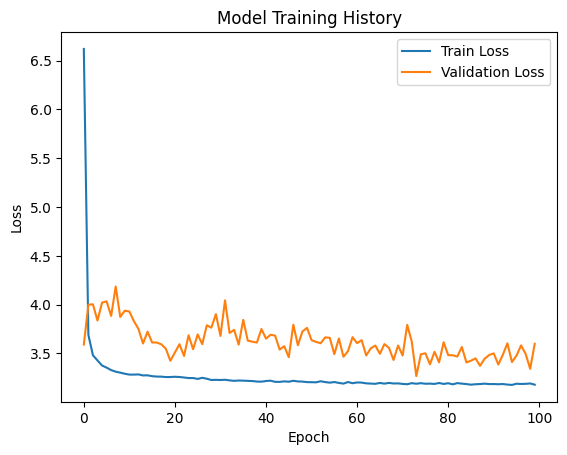

In [48]:
# Importing necessary libraries and modules for deep learning, preprocessing, and evaluation
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# import tensorflow as tf
# import matplotlib.pyplot as plt

# Assuming 'df' is the preprocessed DataFrame

# Defining the target variable and feature set
target = 'price'
features = df.columns.drop(target)

# Splitting the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Encoding categorical variables and scaling numerical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Converting the sparse matrix to a dense array for neural network input
X_train = X_train.toarray()
X_test = X_test.toarray()

# Constructing the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model with training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Making predictions with the trained model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating and printing training and testing set evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1-train_r2) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1-test_r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Neural Networks Training set metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"R^2 Score: {train_r2}")
print(f"Adjusted R^2 Score: {train_adj_r2}\n")

print("Neural Networks Test set metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R^2 Score: {test_r2}")
print(f"Adjusted R^2 Score: {test_adj_r2}")

# Plotting the training history for visualization of loss reduction over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# **Evaluation and Performance Metrics**

## **Comparative Evaluation of Multiple Regression Models**

This cell evaluates four regression models (Linear Regression, Decision Tree, Random Forest, and Gradient Boosting) using a dataset from df_no_outliers. It calculates and stores metrics (MSE, RMSE, MAE, R²) for each model in a DataFrame for easy comparison.

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'df' is your preprocessed DataFrame

# Defining the target variable and feature set
target = 'price'
features = df.columns.drop(target)

# Splitting the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Encoding categorical variables and scaling numerical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Converting the sparse matrix to a dense array for neural network input
X_train = X_train.toarray()
X_test = X_test.toarray()

# Initializing a dictionary to store performance metrics of various models
metrics_dict = {
    'Model': [],
    'Mean Squared Error': [],
    'Root Mean Squared Error': [],
    'Mean Absolute Error': [],
    'R^2 Score': []
}

# Defining a function to compute and add metrics to the dictionary
def add_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    metrics_dict['Model'].append(model_name)
    metrics_dict['Mean Squared Error'].append(mse)
    metrics_dict['Root Mean Squared Error'].append(np.sqrt(mse))
    metrics_dict['Mean Absolute Error'].append(mean_absolute_error(y_true, y_pred))
    metrics_dict['R^2 Score'].append(r2_score(y_true, y_pred))

# Training and evaluating each model, then adding metrics to the dictionary
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
add_metrics('Linear Regression', y_test, lr_model.predict(X_test))

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
add_metrics('Decision Tree', y_test, dt_model.predict(X_test))

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
add_metrics('Random Forest', y_test, rf_model.predict(X_test))

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
add_metrics('Gradient Boosting', y_test, gb_model.predict(X_test))

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
add_metrics('Neural Network', y_test, nn_model.predict(X_test).flatten())

# Converting the metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Printing the DataFrame containing the evaluation metrics for each model
print(metrics_df)


Epoch 1/100
12648/12648 [==============================] - 9s 701us/step - loss: 6.9189 - val_loss: 3.4822
Epoch 2/100
12648/12648 [==============================] - 9s 708us/step - loss: 3.7023 - val_loss: 3.8975
Epoch 3/100
12648/12648 [==============================] - 9s 695us/step - loss: 3.4479 - val_loss: 4.2229
Epoch 4/100
12648/12648 [==============================] - 9s 703us/step - loss: 3.3879 - val_loss: 3.9451
Epoch 5/100
12648/12648 [==============================] - 9s 696us/step - loss: 3.3494 - val_loss: 4.5462
Epoch 6/100
12648/12648 [==============================] - 9s 699us/step - loss: 3.3162 - val_loss: 4.7518
Epoch 7/100
12648/12648 [==============================] - 9s 696us/step - loss: 3.2901 - val_loss: 4.4618
Epoch 8/100
12648/12648 [==============================] - 9s 707us/step - loss: 3.2926 - val_loss: 4.5790
Epoch 9/100
12648/12648 [==============================] - 9s 696us/step - loss: 3.2786 - val_loss: 4.3153
Epoch 10/100
12648/12648 [===========

## **Visualizing Comparative Performance Metrics of Regression Models**

This cell evaluates four regression models (Linear Regression, Decision Tree, Random Forest, and Gradient Boosting) using a dataset from df_no_outliers. It calculates and stores metrics (MSE, RMSE, MAE, R²) for each model in a DataFrame for easy comparison.

               Model  Mean Squared Error  Root Mean Squared Error  \
0  Linear Regression            5.116535                 2.261976   
1      Decision Tree            2.702790                 1.644017   
2      Random Forest            2.687063                 1.639226   
3  Gradient Boosting            3.238935                 1.799704   
4     Neural Network            4.225522                 2.055608   

   Mean Absolute Error  R^2 Score  
0             1.675034   0.933448  
1             1.101095   0.964844  
2             1.100458   0.965049  
3             1.258996   0.957871  
4             1.616822   0.945038  


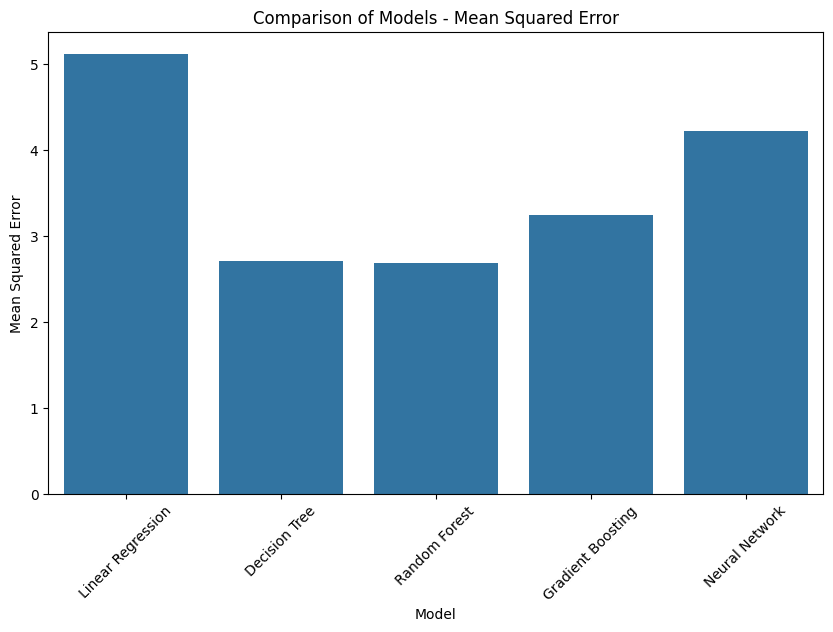

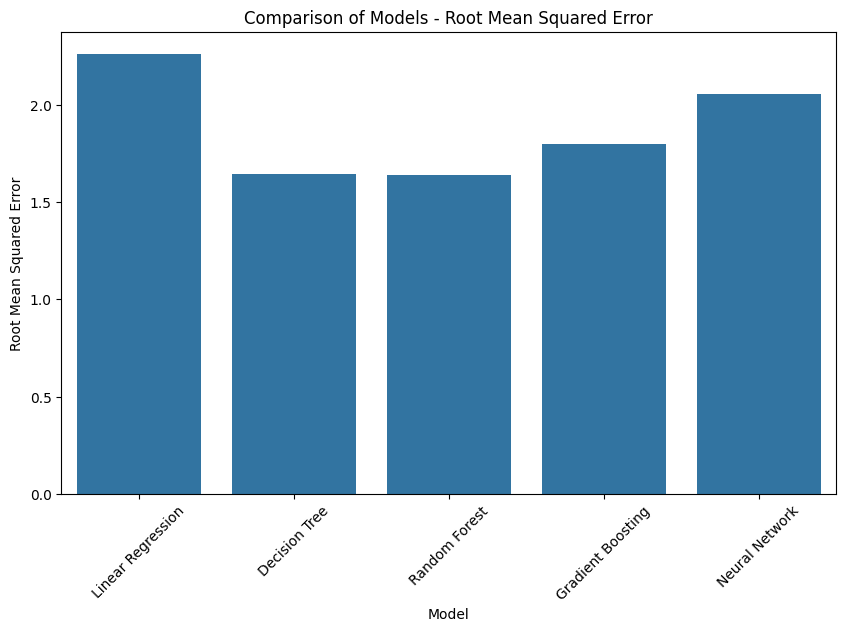

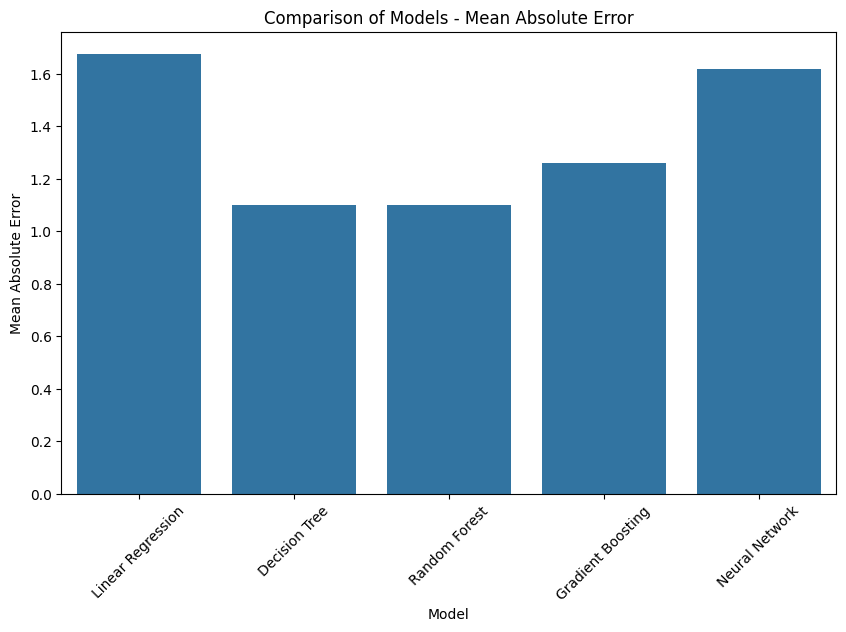

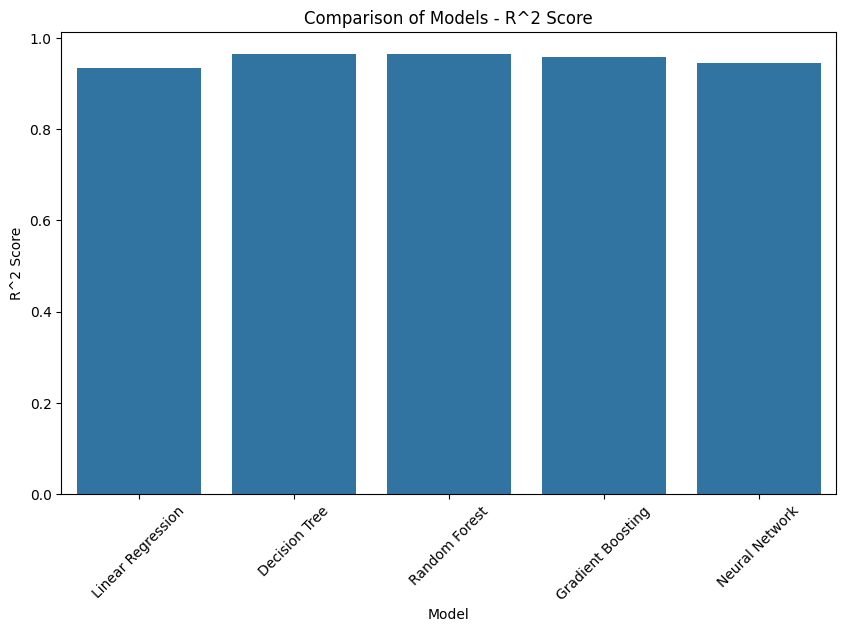

In [50]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Converting the metrics dictionary into a DataFrame for structured visualization
metrics_df = pd.DataFrame(metrics_dict)

# Printing the DataFrame to display the evaluation metrics for each model
print(metrics_df)

# Transforming the DataFrame into a long format suitable for Seaborn plotting
long_format = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Iterating over each metric to create separate bar plots for model comparison
for metric in metrics_df.columns[1:]:
    plt.figure(figsize=(10, 6))  # Setting the figure size
    # Creating a bar plot for each performance metric
    sns.barplot(data=long_format[long_format['Metric'] == metric], x='Model', y='Value')
    plt.title(f'Comparison of Models - {metric}')  # Adding a title for each plot
    plt.ylabel(metric)  # Setting the y-axis label as the metric name
    plt.xticks(rotation=45)  # Rotating the x-axis labels for clarity
    plt.show()  # Displaying the plot
